In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn



In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [14]:
data = pd.read_csv("/content/IMDb Movies India.csv", encoding="latin1")


In [65]:
data.head()

,Genre,Director,Actor 1,Actor 2,Actor 3,Rating
1,Drama,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.0
3,"Comedy, Romance",Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.4
5,"Comedy, Drama, Musical",Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,4.7
6,"Drama, Romance, War",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,7.4
8,"Horror, Mystery, Thriller",Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.6


In [66]:
data.tail()

,Genre,Director,Actor 1,Actor 2,Actor 3,Rating
15501,"Action, Crime, Drama",Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda,5.3
15503,"Action, Crime, Drama",S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.8
15504,Action,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,4.6
15505,"Action, Drama",Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,4.5
15508,"Action, Drama",K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,6.2


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genre     7919 non-null   object 
 1   Director  7919 non-null   object 
 2   Actor 1   7919 non-null   object 
 3   Actor 2   7919 non-null   object 
 4   Actor 3   7919 non-null   object 
 5   Rating    7919 non-null   float64
dtypes: float64(1), object(5)
memory usage: 433.1+ KB


In [68]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [69]:
data = data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']]


In [70]:
data = data.dropna(subset=['Rating'])

In [71]:
data.fillna("Unknown", inplace=True)

In [72]:
X = data.drop('Rating', axis=1)
y = data['Rating']


In [73]:
categorical_features = X.columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [74]:
model = RandomForestRegressor(
    n_estimators=30,
    random_state=42,
    n_jobs=-1
)


In [75]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', model)
])


In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [77]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(n_estimators=30, n_jobs=-1,
                                       random_state=42))])

In [78]:
y_pred = pipeline.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1.4734613558423744
R2 Score: 0.207452218962779


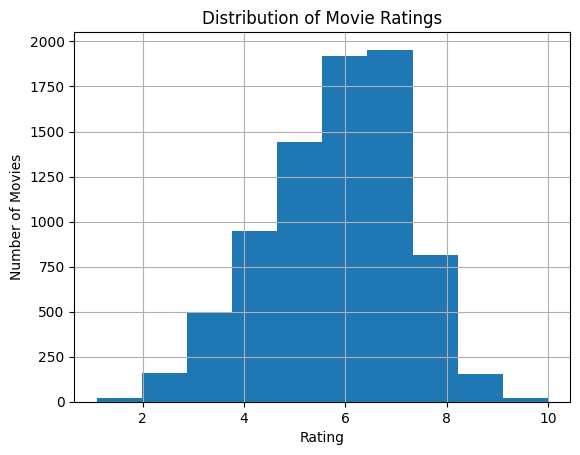

In [79]:
plt.figure()
data['Rating'].hist()
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Ratings")
plt.show()


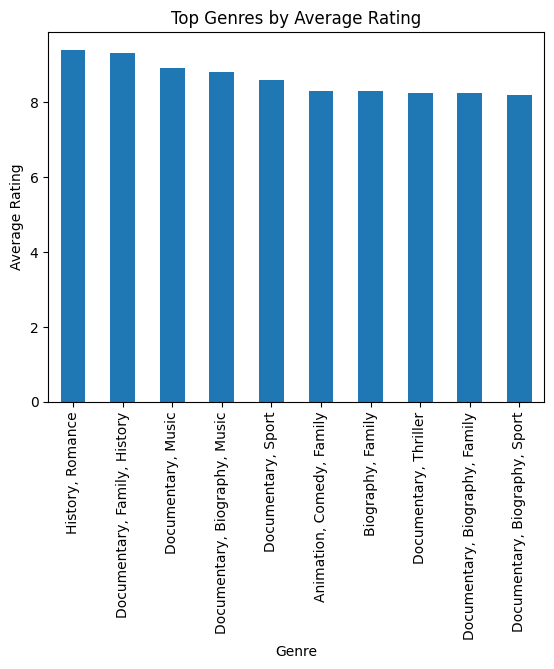

In [80]:
genre_avg = data.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure()
genre_avg.plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Top Genres by Average Rating")
plt.show()


In [81]:
new_movie = pd.DataFrame({
    'Genre': ['Action, Drama'],
    'Director': ['Sukumar'],
    'Actor 1': ['Allu Arjun'],
    'Actor 2': ['Rashmika Mandanna'],
    'Actor 3': ['Fahadh Faasil']
})

predicted_rating = pipeline.predict(new_movie)
print("Predicted Movie Rating:", round(predicted_rating[0], 2))


Predicted Movie Rating: 5.62


In [82]:
new_movie1= pd.DataFrame({
    'Name': ['Vikram'],
    'Genre': ['Action, Thriller'],
    'Director': ['Lokesh Kanagaraj'],
    'Actor 1': ['Kamal Haasan'],
    'Actor 2': ['Vijay Sethupathi'],
    'Actor 3': ['Fahadh Faasil']
})

print(" vikram movie Predicted Rating:", round(pipeline.predict(new_movie1)[0], 2))

new_movie2= pd.DataFrame({
    'Name': ['Baahubali The Beginning'],
    'Genre': ['Action, Drama'],
    'Director': ['S. S. Rajamouli'],
    'Actor 1': ['Prabhas'],
    'Actor 2': ['Anushka Shetty'],
    'Actor 3': ['Rana Daggubati']
})

print("Baahubali The Beginning movie Predicted Rating:", round(pipeline.predict(new_movie2)[0], 2))

new_movie = pd.DataFrame({
    'Name': ['RRR'],
    'Genre': ['Action, Drama'],
    'Director': ['S. S. Rajamouli'],
    'Actor 1': ['Ram Charan'],
    'Actor 2': ['Jr NTR'],
    'Actor 3': ['Alia Bhatt']
})

print("RRR Predicted Rating:", round(pipeline.predict(new_movie)[0], 2))

new_movie = pd.DataFrame({
    'Name': ['Kantara'],
    'Genre': ['Action, Drama'],
    'Director': ['Rishab Shetty'],
    'Actor 1': ['Rishab Shetty'],
    'Actor 2': ['Sapthami Gowda'],
    'Actor 3': ['Achyuth Kumar']
})

print("Kantara Predicted Rating:", round(pipeline.predict(new_movie)[0], 2))






 vikram movie Predicted Rating: 6.17
Baahubali The Beginning movie Predicted Rating: 5.62
RRR Predicted Rating: 5.62
Kantara Predicted Rating: 5.62
